## Keras -- Different MLP Architectures on MNIST dataset

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [114]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [116]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [117]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [119]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [120]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# this function is used to draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure()
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('\nCategorical Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show();

<h2>  Softmax classifier with 2 Hidden layers </h2>

In [0]:
# https://keras.io/getting-started/sequential-model-guide/

# The Sequential model is a linear stack of layers.
# you can create a Sequential model by passing a list of layer instances to the constructor:

# You can  add layers via the .add() method:

# model = Sequential()
# model.add(Dense(32, input_dim=784))
# model.add(Activation('relu'))

###

# https://keras.io/layers/core/

# keras.layers.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', 
# bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, 
# kernel_constraint=None, bias_constraint=None)

# Dense implements the operation: output = activation(dot(input, kernel) + bias) where
# activation is the element-wise activation function passed as the activation argument, 
# kernel is a weights matrix created by the layer, and 
# bias is a bias vector created by the layer (only applicable if use_bias is True).

# output = activation(dot(input, kernel) + bias)  => y = activation(WT. X + b)

####

# https://keras.io/activations/

# Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers:

# from keras.layers import Activation, Dense

# model.add(Dense(64))
# model.add(Activation('tanh'))

# This is equivalent to:
# model.add(Dense(64, activation='tanh'))

# there are many activation functions ar available ex: tanh, relu, softmax


from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [123]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]
print("input dim: ", input_dim)

batch_size = 128 
nb_epoch = 20

input dim:  784


In [124]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = √(2/(784) = 0.0505  => N(0,σ) = N(0,0.0505)
# h2 =>  σ=√(2/(fan_in) = √(2/(256) = 0.088  => N(0,σ) = N(0,0.088)
# out =>  σ=√(2/(fan_in+1) = √(2/(128) = 0.125  => N(0,σ) = N(0,0.125)

model.add(Dense(256, activation='relu', input_dim=input_dim, kernel_initializer=RandomNormal(mean=0.0, stddev=0.505, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.088, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 256)               200960    
_________________________________________________________________
batch_normalization_21 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 64)                16448     
_________________________________________________________________
batch_normalization_22 (Batc (None, 64)                256       
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)                650       
Total para

In [125]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.9407 - acc: 0.7067 - val_loss: 0.2925 - val_acc: 0.9166
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.4657 - acc: 0.8580 - val_loss: 0.2186 - val_acc: 0.9377
Epoch 3/20
60000/60000 [==============================] - 3s 55us/step - loss: 0.3698 - acc: 0.8887 - val_loss: 0.1839 - val_acc: 0.9447
Epoch 4/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.3186 - acc: 0.9053 - val_loss: 0.1614 - val_acc: 0.9510
Epoch 5/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.2809 - acc: 0.9152 - val_loss: 0.1453 - val_acc: 0.9562
Epoch 6/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.2526 - acc: 0.9253 - val_loss: 0.1317 - val_acc: 0.9608
Epoch 7/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.2313 - acc: 0.9305 - val_loss: 0.1239 - val_acc

Test score: 0.08114210154800676
Test accuracy: 0.9756


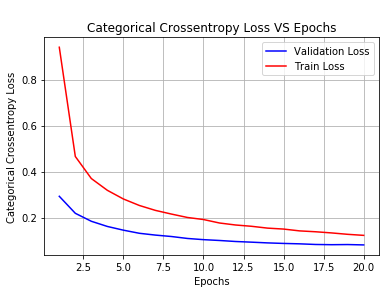

In [126]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

test_acc_2 = score[1]
train_acc_2 = history.history['acc']

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty)

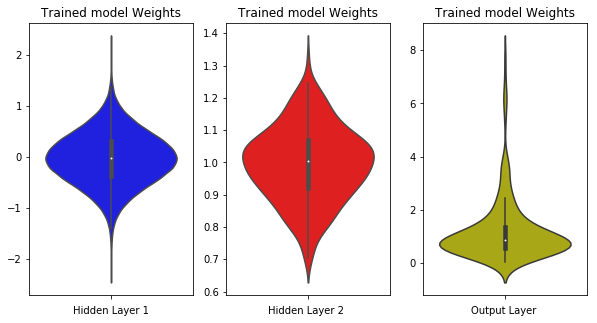

In [127]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Softmax classifier with 3 Hidden layers </h2>
 <h5>  MLP + Relu activation + AdamOptimizer </h5>

In [128]:
model_3 = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = √(2/(784) = 0.050  => N(0,σ) = N(0,0.0505)
# h2 =>  σ=√(2/(fan_in) = √(2/(512) = 0.062  => N(0,σ) = N(0,0.062)
# h3 =>  σ=√(2/(fan_in+1) = √(2/(256) = 0.088  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = √(2/(128) = 0.125  => N(0,σ) = N(0,0.125)

model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.050, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.062, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.088, seed=None)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.5))

model_3.add(Dense(output_dim, activation='softmax'))

model_3.summary()

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_3 = model_3.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data = (X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_21 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 128)               32896     
__________

Test score: 0.055513024585170205
Test accuracy: 0.9839


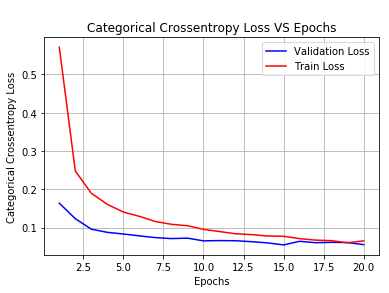

In [129]:
score_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score_3[0]) 
print('Test accuracy:', score_3[1])

test_acc_3 = score_3[1]
train_acc_3 = history_3.history['acc']

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history_3.history['val_loss']
ty = history_3.history['loss']
plt_dynamic(x, vy, ty)

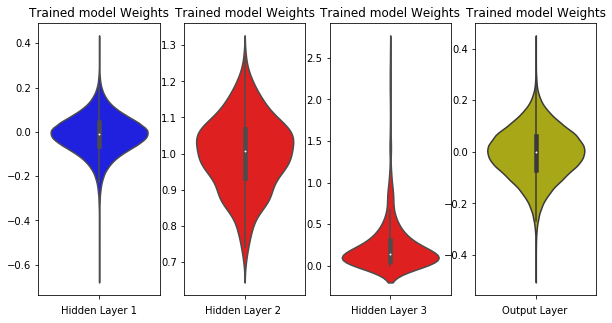

In [130]:
w_after = model_3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
out_w = w_after[6].flatten().reshape(-1,1)


fig = plt.figure(figsize=(10,5))
plt.title("Weight matrices after model trained")
plt.subplot(1, 4, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 4, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 4, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 4, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h2> Softmax classifier with 5 Hidden layers </h2>
 <h5>  MLP + Relu activation + AdamOptimizer </h5>

In [131]:
model_5 = Sequential()

# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = √(2/(784) = 0.050  => N(0,σ) = N(0,0.0505)
# h2 =>  σ=√(2/(fan_in) = √(2/(1024) = 0.044  => N(0,σ) = N(0,0.044)
# h3 =>  σ=√(2/(fan_in) = √(2/(512) = 0.062  => N(0,σ) = N(0,0.062)
# h4 =>  σ=√(2/(fan_in) = √(2/(256) = 0.088  => N(0,σ) = N(0,0.088)
# h5 =>  σ=√(2/(fan_in) = √(2/(128) = 0.125  => N(0,σ) = N(0,0.125)
# out =>  σ=√(2/(fan_in+1) = √(2/(64) = 0.176  => N(0,σ) = N(0,0.176)

model_5.add(Dense(1024, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.050, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.044, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(256, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.062, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.088, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(64, activation='relu', input_shape=(input_dim,), kernel_initializer = RandomNormal(mean=0.0, stddev =0.125, seed=None)))
model_5.add(BatchNormalization())
model_5.add(Dropout(0.5))

model_5.add(Dense(output_dim, activation='softmax'))

model_5.summary()

model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_5 = model_5.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data = (X_test, Y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_76 (Dense)             (None, 1024)              803840    
_________________________________________________________________
batch_normalization_26 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_24 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_77 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_27 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 256)               131328    
__________

Test score: 0.0645553352378076
Test accuracy: 0.9835


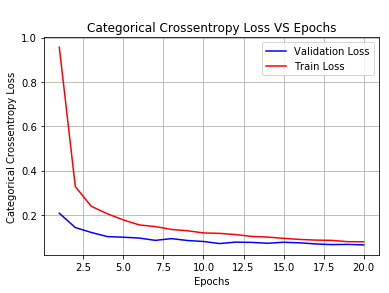

In [132]:
score_5 = model_5.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score_5[0]) 
print('Test accuracy:', score_5[1])

test_acc_5 = score_5[1]
train_acc_5 = history_5.history['acc']

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history_5.history['val_loss']
ty = history_5.history['loss']
plt_dynamic(x, vy, ty)

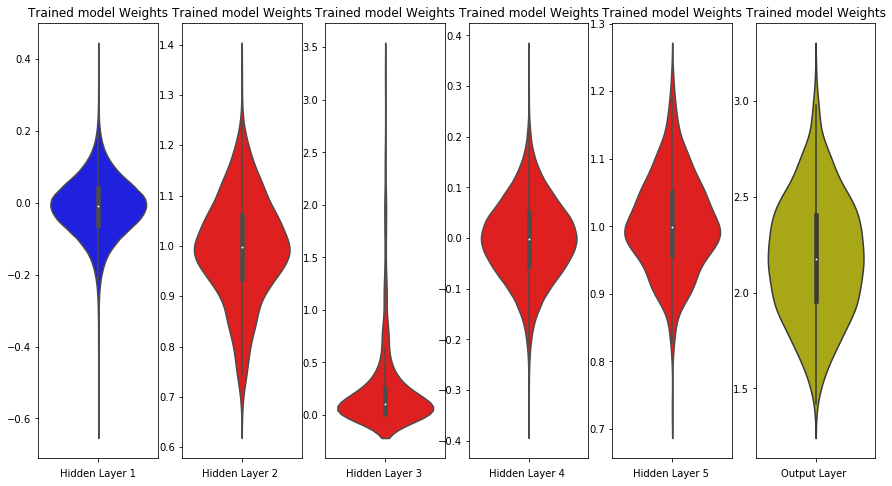

In [133]:
w_after = model_5.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
h3_w = w_after[4].flatten().reshape(-1,1)
h4_w = w_after[6].flatten().reshape(-1,1)
h5_w = w_after[8].flatten().reshape(-1,1)
out_w = w_after[10].flatten().reshape(-1,1)


fig = plt.figure(figsize=(15,8))
plt.title("Weight matrices after model trained")
plt.subplot(1, 6, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 6, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 6, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h3_w, color='r')
plt.xlabel('Hidden Layer 3 ')

plt.subplot(1, 6, 4)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h4_w, color='r')
plt.xlabel('Hidden Layer 4 ')

plt.subplot(1, 6, 5)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h5_w, color='r')
plt.xlabel('Hidden Layer 5 ')

plt.subplot(1, 6, 6)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

<h3>CONCLUSION</h3>

**(a). Procedure Followed :**

1.   Load MNIST dataset from Keras
2.   Split the dataset into train and test
3.   Converted image into single dimension
4.   Normalize the train and test data
5.   Convert class label into categorical data vector
6.   Implement Softmax classifier with 2 , 3 and 5 hidden layers
7.   Add Dropout and Batch Normalization to the hidden layers
8.   Plotted Categorical Crossentropy Loss VS No.of Epochs
9.   Plotted weight range for each layer






**(b) Table (Different models with their train and test accuracies):**

In [135]:
# Creating table using PrettyTable library
from prettytable import PrettyTable

# Names of models
names = ['MLP(2-hidden layers)', 'MLP(3-hidden layers)', 'MLP(5-hidden layers)']

# Training accuracies
train_acc = [train_acc_2[19], train_acc_3[19], train_acc_5[19]]

# Test accuracies
test_acc = [test_acc_2, test_acc_3, test_acc_5]

numbering = [1,2,3]

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)
ptable.add_column("Training Accuracy",train_acc)
ptable.add_column("Test Accuracy",test_acc)

# Printing the Table
print(ptable)

+-------+----------------------+--------------------+---------------+
| S.NO. |        MODEL         | Training Accuracy  | Test Accuracy |
+-------+----------------------+--------------------+---------------+
|   1   | MLP(2-hidden layers) | 0.9639833333333333 |     0.9756    |
|   2   | MLP(3-hidden layers) | 0.9799666666984558 |     0.9839    |
|   3   | MLP(5-hidden layers) | 0.9790499999682108 |     0.9835    |
+-------+----------------------+--------------------+---------------+
